# Caso Base
Implementación del CVRP estándar común a los tres proyectos

## Procesamiento de Datos

Leemos los archivos csv y los ponemos en formato dataframe.

In [7]:
import pandas as pd

clients_df = pd.read_csv('data_cases/caso_base/clients.csv')
depots_df = pd.read_csv('data_cases/caso_base/depots.csv')
vehicles_df = pd.read_csv('data_cases/caso_base/vehicles.csv')

Utilizamos el `LocationID` como el identificador para el puerto y los clientes. Adicionalmente juntamos todos los nodos, incluyendo el puerto para posteriormente sacar las longitudes y latitudes.

In [8]:
puertos = depots_df['LocationID'].tolist()
clientes = clients_df['LocationID'].tolist()
nodos = puertos + clientes

In [9]:
print("LocationID del puerto:" + str(puertos[0]))
print("\nLocationIDs de los clientes:" + str(clientes))
print("\nLocationIDs de los nodos:" + str(nodos))

LocationID del puerto:1

LocationIDs de los clientes:[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

LocationIDs de los nodos:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


Ponemos todos los nodos de localización en una sola lista y sacamos las coordenadas.

In [10]:
coords_df = pd.concat([
    depots_df[['LocationID', 'Longitude', 'Latitude']],
    clients_df[['LocationID', 'Longitude', 'Latitude']]
], ignore_index=True)

coords = {int(row['LocationID']): (float(row['Longitude']), float(row['Latitude'])) 
          for _, row in coords_df.iterrows()}

coords

{1: (-74.153536, 4.743359),
 2: (-74.09893796560621, 4.59795431125545),
 3: (-74.07557103763986, 4.687820646838871),
 4: (-74.10708524062704, 4.70949446000624),
 5: (-74.09727965657427, 4.605029068682624),
 6: (-74.16464148202755, 4.648463876533332),
 7: (-74.12083799988112, 4.662137416953968),
 8: (-74.02213076607309, 4.697499030379109),
 9: (-74.17207549744595, 4.649416884236942),
 10: (-74.15615257246444, 4.606310650273935),
 11: (-74.09041145358674, 4.557379705282216),
 12: (-74.17802255204528, 4.591594072172954),
 13: (-74.1015410917749, 4.7564172406324055),
 14: (-74.09690889182339, 4.646217006050524),
 15: (-74.1219200708342, 4.725912125314368),
 16: (-74.0942948461378, 4.604168478560718),
 17: (-74.11138839002187, 4.557320898243896),
 18: (-74.12463941285208, 4.615869066082658),
 19: (-74.12456164551857, 4.656402930181292),
 20: (-74.04990580408855, 4.706188309535041),
 21: (-74.121866801394, 4.746624762561149),
 22: (-74.02454895778163, 4.746517184687941),
 23: (-74.0868359270

Utilizamos la función de Harvesine para sacar las distancias en km.

In [11]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(i, j):
    lon1, lat1 = coords[i]
    lon2, lat2 = coords[j]
    
    # Convertir a radianes
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # Fórmula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    R = 6371  # Radio de la Tierra en km
    return R * c

Dejamos solamente el número entero en km de la distancia entre nodos. Asumiendo que todos los nodos pueden conectarse entre ellos.

In [12]:
arcos = [(i, j) for i in nodos for j in nodos if i != j]
dist_dict = {(i, j): int(haversine_distance(i, j)) for (i, j) in arcos}

arcos
dist_dict

{(1, 2): 17,
 (1, 3): 10,
 (1, 4): 6,
 (1, 5): 16,
 (1, 6): 10,
 (1, 7): 9,
 (1, 8): 15,
 (1, 9): 10,
 (1, 10): 15,
 (1, 11): 21,
 (1, 12): 17,
 (1, 13): 5,
 (1, 14): 12,
 (1, 15): 4,
 (1, 16): 16,
 (1, 17): 21,
 (1, 18): 14,
 (1, 19): 10,
 (1, 20): 12,
 (1, 21): 3,
 (1, 22): 14,
 (1, 23): 15,
 (1, 24): 4,
 (1, 25): 18,
 (2, 1): 17,
 (2, 3): 10,
 (2, 4): 12,
 (2, 5): 0,
 (2, 6): 9,
 (2, 7): 7,
 (2, 8): 13,
 (2, 9): 9,
 (2, 10): 6,
 (2, 11): 4,
 (2, 12): 8,
 (2, 13): 17,
 (2, 14): 5,
 (2, 15): 14,
 (2, 16): 0,
 (2, 17): 4,
 (2, 18): 3,
 (2, 19): 7,
 (2, 20): 13,
 (2, 21): 16,
 (2, 22): 18,
 (2, 23): 3,
 (2, 24): 14,
 (2, 25): 3,
 (3, 1): 10,
 (3, 2): 10,
 (3, 4): 4,
 (3, 5): 9,
 (3, 6): 10,
 (3, 7): 5,
 (3, 8): 6,
 (3, 9): 11,
 (3, 10): 12,
 (3, 11): 14,
 (3, 12): 15,
 (3, 13): 8,
 (3, 14): 5,
 (3, 15): 6,
 (3, 16): 9,
 (3, 17): 15,
 (3, 18): 9,
 (3, 19): 6,
 (3, 20): 3,
 (3, 21): 8,
 (3, 22): 8,
 (3, 23): 7,
 (3, 24): 6,
 (3, 25): 13,
 (4, 1): 6,
 (4, 2): 12,
 (4, 3): 4,
 (4, 5): 11,
 

Creamos 4 diccionarios:
1. **Diccionario de Demanda:** Guarda los valores de demanda de los diferentes clientes a partir de su `LocationID`. No se incluye el del puerto sabiendo que nada llega a él.

2. **Diccionario de Capacidad:** Guarda los valores de la capacidad máxima de cada vehículo a partir de su `VehicleID`.

3. **Diccionario de Rango:** guarda el rango de cada vehiculo a partir de su `VehicleID`.

In [13]:
# Demanda por cliente
demanda_dict = clients_df.set_index('LocationID')['Demand'].to_dict()
demanda_dict

{2: 13,
 3: 15,
 4: 12,
 5: 15,
 6: 20,
 7: 17,
 8: 17,
 9: 20,
 10: 20,
 11: 15,
 12: 17,
 13: 12,
 14: 21,
 15: 15,
 16: 17,
 17: 10,
 18: 25,
 19: 12,
 20: 11,
 21: 15,
 22: 14,
 23: 18,
 24: 15,
 25: 11}

In [14]:
# Capacidad de carga de los vehículos
capacidad_dict = vehicles_df.set_index('VehicleID')['Capacity'].to_dict()
capacidad_dict

{1: 130, 2: 140, 3: 120, 4: 100, 5: 70, 6: 55, 7: 110, 8: 114}

In [15]:
# Rango de cada vehículo
rango_dict = vehicles_df.set_index('VehicleID')['Range'].to_dict()
rango_dict

{1: 170, 2: 200, 3: 180, 4: 90, 5: 100, 6: 170, 7: 150, 8: 140}

In [16]:
vehiculos = vehicles_df['VehicleID'].tolist()
vehiculos

[1, 2, 3, 4, 5, 6, 7, 8]

Recap de los nodos y procesamiento de los nodos

In [17]:
print("Origen Nacional o Puerto: " + str(puertos))
print("Clientes: " + str(clientes))
print("Nodos: " + str(nodos))
print("Arcos: " + str(arcos))
print("Distancias: " + str(dist_dict))
print("Demanda: " + str(demanda_dict))
print("Capacidad: " + str(capacidad_dict))
print("Rango: " + str(rango_dict))
print("Vehiculos: " + str(vehiculos))

Origen Nacional o Puerto: [1]
Clientes: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Nodos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Arcos: [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 

In [18]:
print("Demanda total: " + str(sum(demanda_dict.values())))
print("Capacidad total: " + str(sum(capacidad_dict.values())))

Demanda total: 377
Capacidad total: 839


## Implementación del Modelo Matemático

### Conjuntos

In [19]:
from pyomo.environ import *
from pyomo.opt import SolverFactory
from amplpy import modules

model = ConcreteModel()

# Conjunto de nodos 
model.N = Set(initialize=nodos)

# Conjunto de puntos de acceso (Puertos)
model.P = Set(within=model.N, initialize=puertos)

# Conjunto de clientes o destinos (Centros de consumo)
model.D = Set(within=model.N, initialize=clientes)

# Conjunto de arcos posibles entre nodos
model.A = Set(dimen=2, initialize=arcos)

# Conjutno de vehículos
model.V = Set(initialize=vehiculos)



### Parámetros

In [20]:
# Distancia entre nodos
model.distancia = Param(model.A, initialize=dist_dict, within=NonNegativeReals)

# Demanda de clientes o centros de consumo
model.demanda = Param(model.D, initialize=demanda_dict, default=0, within=NonNegativeReals)

# Capacidad de los vehículos
model.capacidad = Param(model.V, initialize=capacidad_dict, within=PositiveReals)

# Autonomía de los vehículos
model.autonomia = Param(model.V, initialize=rango_dict, within=PositiveReals)


### Variables de Decisión

In [21]:

# El vehículo v utiliza el arco (i,j) 
model.x = Var(model.A, model.V, domain=Binary)

# Carga acumulada al llegar a cliente i con vehículo v
model.w = Var(model.D, model.V, domain=NonNegativeReals)

# Total km recorridos por vehículo
model.distancia_total = Var(model.V, domain=NonNegativeReals)


### Restricciones

In [22]:
# Cada vehiculo que sale de un puerto tiene que regresar al mismo puerto
def flujo_balanceado(model, n, v):
    entrada = sum(model.x[i, n, v] for (i, j) in model.A if j == n)
    salida = sum(model.x[n, j, v] for (i, j) in model.A if i == n)
    return entrada == salida

model.flujo = Constraint(model.N, model.V, rule=flujo_balanceado)

# Cada cliente debe ser visitado exactamente una vez
def visita_unica(model, c):
    return sum(model.x[i, c, v] for (i, j) in model.A if j == c for v in model.V) == 1

model.visita = Constraint(model.D, rule=visita_unica)

# Cada vehículo puede salir del puerto a lo sumo una vez
def salida_puerto(model, v):
    return sum(model.x[p, j, v] for (p, j) in model.A if p in model.P) <= 1

model.salida = Constraint(model.V, rule=salida_puerto)

# Capacidad máxima del vehículo
def restriccion_capacidad(model, v):
    return sum(model.w[i, v] for i in model.D) <= model.capacidad[v]

model.capacidad_maxima = Constraint(model.V, rule=restriccion_capacidad)

# Subtour elimination usando MTZ
def subtour_eliminacion(model, i, j, v):
    if i != j:
        return model.w[i, v] + model.demanda[j] - model.w[j, v] <= model.capacidad[v] * (1 - model.x[i, j, v])
    return Constraint.Skip

model.subtour = Constraint(model.D, model.D, model.V, rule=subtour_eliminacion)

# Restricción de autonomía del vehículo
def restriccion_autonomia(model, v):
    return sum(model.distancia[i, j] * model.x[i, j, v] for (i, j) in model.A) <= model.autonomia[v]

model.autonomia_maxima = Constraint(model.V, rule=restriccion_autonomia)

# Un viaje ida y vuelta por vehículo (una iteración)
def viaje_unico(model, v):
    salidas = sum(model.x[p, j, v] for (p, j) in model.A if p in model.P)
    retornos = sum(model.x[i, p, v] for (i, p) in model.A if p in model.P)
    return salidas == retornos

model.unica_iteracion = Constraint(model.V, rule=viaje_unico)

# Distancia total = suma de las distancias de los arcos usados
def calcular_distancia_total(model, v):
    return model.distancia_total[v] == sum(model.distancia[i, j] * model.x[i, j, v] for (i, j) in model.A)

model.distancia_total_construida = Constraint(model.V, rule=calcular_distancia_total)

### Función Objetivo

In [ ]:
# Minimizar la distancia total recorrida
def objetivo(model):
    return sum(model.distancia[i, j] * model.x[i, j, v]
               for (i, j) in model.A for v in model.V)

model.objetivo = Objective(rule=objetivo, sense=minimize)


### Resolución del Modelo

In [24]:
solver_name = "highs"
solver = SolverFactory(solver_name, executable = modules.find(solver_name))
result = solver.solve(model, tee=True, options={"time_limit": 60})

HiGHS 1.10.0:   lim:time = 60
  lim:time = 60
  Warning code 1 while solving with HiGHS
model.name="unknown";
    - termination condition: maxIterations
    - message from solver: HiGHS 1.10.0\x3a time limit, feasible solution;
      objective 212; 65526 simplex iterations; 67 branching nodes;
      absmipgap=155, relmipgap=0.731132


### Análisis de resultados

Rutas iniciales captadas por el modelo

In [25]:
arcos_por_vehiculo = {v: [] for v in model.V}

for (i, j) in model.A:
    for v in model.V:
        if model.x[i, j, v].value and model.x[i, j, v].value > 0.5:
            print(f"Vehículo {v} viaja de {i} a {j}")
            arcos_por_vehiculo[v].append((i, j))
              


Vehículo 7 viaja de 1 a 4
Vehículo 2 viaja de 1 a 5
Vehículo 4 viaja de 1 a 9
Vehículo 5 viaja de 1 a 15
Vehículo 3 viaja de 1 a 18
Vehículo 1 viaja de 1 a 20
Vehículo 6 viaja de 1 a 23
Vehículo 2 viaja de 2 a 16
Vehículo 3 viaja de 3 a 1
Vehículo 7 viaja de 4 a 1
Vehículo 2 viaja de 5 a 17
Vehículo 4 viaja de 6 a 1
Vehículo 4 viaja de 7 a 19
Vehículo 1 viaja de 8 a 22
Vehículo 4 viaja de 9 a 7
Vehículo 3 viaja de 10 a 12
Vehículo 2 viaja de 11 a 2
Vehículo 3 viaja de 12 a 3
Vehículo 1 viaja de 13 a 1
Vehículo 6 viaja de 14 a 25
Vehículo 5 viaja de 15 a 24
Vehículo 2 viaja de 16 a 1
Vehículo 2 viaja de 17 a 11
Vehículo 3 viaja de 18 a 10
Vehículo 4 viaja de 19 a 6
Vehículo 1 viaja de 20 a 8
Vehículo 5 viaja de 21 a 1
Vehículo 1 viaja de 22 a 13
Vehículo 6 viaja de 23 a 14
Vehículo 5 viaja de 24 a 21
Vehículo 6 viaja de 25 a 1


Agrupación de rutas de cada vehículo

In [26]:
verificacion = {}

for v, arcos in arcos_por_vehiculo.items():
    if not arcos:
        continue
        
    verificacion[v] = {
        'depodid': 1,
        'initialload': capacidad_dict[v],
        'clientsserved': [],
        'demandssatisfied': 0,
        'totaldistance': 0
    }
    
    ruta_ordenada = []
    nodo_actual = 1 
    
    while len(arcos) > 0:
        for idx, (i, j) in enumerate(arcos):
            if i == nodo_actual:
                ruta_ordenada.append((i, j))
                nodo_actual = j
                arcos.pop(idx)
                break
    
    secuencia = []
    for i, j in ruta_ordenada:
        if not secuencia or secuencia[-1] != i:
            secuencia.append(i)
        secuencia.append(j)
        
        if j != 1 and j not in verificacion[v]['clientsserved']:
            verificacion[v]['clientsserved'].append(j)
            if j in demanda_dict:
                verificacion[v]['demandssatisfied'] += demanda_dict[j]

        verificacion[v]['totaldistance'] += dist_dict[(i, j)]
    
    verificacion[v]['routesequence'] = '-'.join(map(str, secuencia))
    verificacion[v]['clientsserved'] = ','.join(map(str, verificacion[v]['clientsserved']))

verificacion

{1: {'depodid': 1,
  'initialload': 130,
  'clientsserved': '20,8,22,13',
  'demandssatisfied': 54,
  'totaldistance': 33,
  'routesequence': '1-20-8-22-13-1'},
 2: {'depodid': 1,
  'initialload': 140,
  'clientsserved': '5,17,11,2,16',
  'demandssatisfied': 70,
  'totaldistance': 43,
  'routesequence': '1-5-17-11-2-16-1'},
 3: {'depodid': 1,
  'initialload': 120,
  'clientsserved': '18,10,12,3',
  'demandssatisfied': 77,
  'totaldistance': 44,
  'routesequence': '1-18-10-12-3-1'},
 4: {'depodid': 1,
  'initialload': 100,
  'clientsserved': '9,7,19,6',
  'demandssatisfied': 69,
  'totaldistance': 29,
  'routesequence': '1-9-7-19-6-1'},
 5: {'depodid': 1,
  'initialload': 70,
  'clientsserved': '15,24,21',
  'demandssatisfied': 45,
  'totaldistance': 8,
  'routesequence': '1-15-24-21-1'},
 6: {'depodid': 1,
  'initialload': 55,
  'clientsserved': '23,14,25',
  'demandssatisfied': 50,
  'totaldistance': 43,
  'routesequence': '1-23-14-25-1'},
 7: {'depodid': 1,
  'initialload': 110,
  'c

Creación de archivo csv con solución

In [27]:
# Convert dictionary to DataFrame and save as CSV
import pandas as pd

# Initialize lists to store each column
vehicle_ids = []
depot_ids = []
initial_loads = []
route_sequences = []
clients_served = []
demands_satisfied = []
total_distances = []

# Extract data from the verification dictionary
for vehicle_id, data in verificacion.items():
    vehicle_ids.append(vehicle_id)
    depot_ids.append(data['depodid'])
    initial_loads.append(data['initialload'])
    route_sequences.append(data['routesequence'])
    clients_served.append(data['clientsserved'])
    demands_satisfied.append(data['demandssatisfied'])
    total_distances.append(data['totaldistance'])

# Create DataFrame
results_df = pd.DataFrame({
    'VehicleId': vehicle_ids,
    'DepotId': depot_ids,
    'InitialLoad': initial_loads,
    'RouteSequence': route_sequences,
    'ClientsServed': clients_served,
    'DemandsSatisfied': demands_satisfied,
    'TotalDistance': total_distances
})

# Save to CSV
csv_file = 'vehicle_routes_results.csv'
results_df.to_csv(csv_file, index=False)

print(f"Results saved to {csv_file}")

# Display the DataFrame
results_df

Results saved to vehicle_routes_results.csv


,VehicleId,DepotId,InitialLoad,RouteSequence,ClientsServed,DemandsSatisfied,TotalDistance
0,1,1,130,1-20-8-22-13-1,"20,8,22,13",54,33
1,2,1,140,1-5-17-11-2-16-1,"5,17,11,2,16",70,43
2,3,1,120,1-18-10-12-3-1,"18,10,12,3",77,44
3,4,1,100,1-9-7-19-6-1,"9,7,19,6",69,29
4,5,1,70,1-15-24-21-1,"15,24,21",45,8
5,6,1,55,1-23-14-25-1,"23,14,25",50,43
6,7,1,110,1-4-1,4,12,12


Creación de mapas

In [28]:
import random


def graficar_rutas_verificacion(verificacion, clients_df, depots_df):
    import matplotlib.pyplot as plt

    # Unificar coordenadas en un solo DataFrame indexado por LocationID
    coords_df = pd.concat([
        clients_df[['LocationID', 'Longitude', 'Latitude']],
        depots_df[['LocationID', 'Longitude', 'Latitude']]
    ], ignore_index=True).drop_duplicates(subset='LocationID').set_index('LocationID')

    # Crear mapa de nombres para nodos
    nombre_nodo = {row['LocationID']: f"C{int(row['LocationID']):03}" for _, row in clients_df.iterrows()}
    for _, row in depots_df.iterrows():
        nombre_nodo[row['LocationID']] = row['DepotID']

    # Crear figura
    plt.figure(figsize=(10, 10))
    plt.title("Rutas por Vehículo")

    # Dibujar nodos
    for loc_id, (lon, lat) in coords_df.iterrows():
        es_deposito = loc_id in depots_df['LocationID'].values
        plt.plot(lon, lat, 'ko' if es_deposito else 'bo')
        plt.text(lon + 0.01, lat + 0.01, nombre_nodo[loc_id], fontsize=8)

    # Dibujar rutas para cada vehículo como líneas
    colores = {}
    for v, datos in verificacion.items():
        ruta = list(map(int, datos['routesequence'].split('-')))
        color = "#" + ''.join(random.choices('0123456789ABCDEF', k=6))
        colores[v] = color
        for i in range(len(ruta) - 1):
            origen = ruta[i]
            destino = ruta[i + 1]
            x1, y1 = coords_df.loc[origen]
            x2, y2 = coords_df.loc[destino]
            plt.plot([x1, x2], [y1, y2], color=color, linewidth=2)

    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.grid(True)
    plt.show()


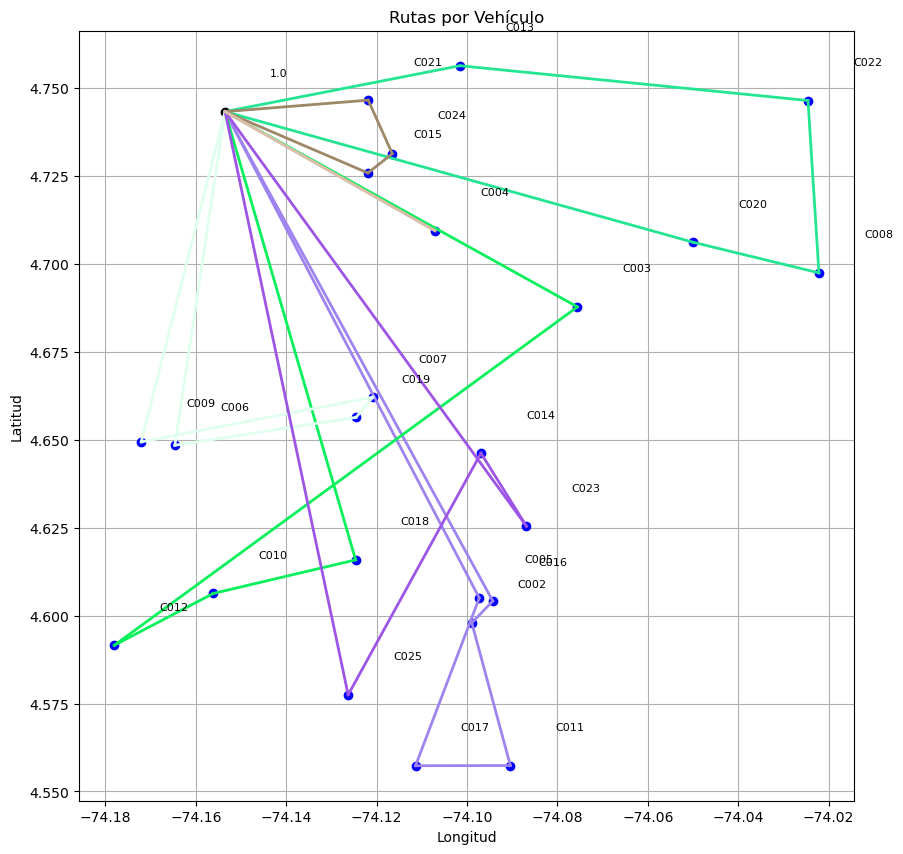

In [29]:
graficar_rutas_verificacion(verificacion, clients_df, depots_df)

In [30]:
%pip install folium

In [31]:
import folium
from folium import Map, Marker, PolyLine
import random

def graficar_rutas_en_mapa(verificacion, clients_df, depots_df):
    # Unificar coordenadas
    coords_df = pd.concat([
        clients_df[['LocationID', 'Longitude', 'Latitude']],
        depots_df[['LocationID', 'Longitude', 'Latitude']]
    ], ignore_index=True).drop_duplicates(subset='LocationID').set_index('LocationID')

    # Crear mapa centrado en Colombia
    mapa = folium.Map(location=[4.6, -74.1], zoom_start=6)

    # Nombres
    nombre_nodo = {row['LocationID']: f"C{int(row['LocationID']):03}" for _, row in clients_df.iterrows()}
    for _, row in depots_df.iterrows():
        nombre_nodo[row['LocationID']] = row['DepotID']

    # Añadir marcadores
    for loc_id, (lon, lat) in coords_df.iterrows():
        nombre = nombre_nodo.get(loc_id, f"Node {loc_id}")
        color = 'black' if loc_id in depots_df['LocationID'].values else 'blue'
        folium.CircleMarker(location=[lat, lon], radius=5, color=color, fill=True,
                            fill_opacity=0.9, popup=nombre).add_to(mapa)

    # Dibujar rutas por vehículo
    for v, datos in verificacion.items():
        ruta = list(map(int, datos['routesequence'].split('-')))
        coords = [[coords_df.loc[n, 'Latitude'], coords_df.loc[n, 'Longitude']] for n in ruta]
        color = "#" + ''.join(random.choices('0123456789ABCDEF', k=6))
        folium.PolyLine(locations=coords, color=color, weight=5, opacity=0.7,
                        popup=f"Vehículo {v}").add_to(mapa)

    return mapa


In [32]:
mapa = graficar_rutas_en_mapa(verificacion, clients_df, depots_df)
mapa 
